In [154]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from scipy.stats import chi2_contingency

# <font color=pink> Data Preparation

In [155]:
#Importing dataset
CustomerData = pd.read_csv('CustmPersonalityData.csv')
CustomerData.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/8/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/1/2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [156]:
CustomerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [157]:
#Dropping duplicates
CustomerData = CustomerData.drop_duplicates()

In [158]:
#Checking if any duplicate values were dropped(No duplicates)
CustomerData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [159]:
#Separating the response variable into a different dataframe
Response = pd.DataFrame(CustomerData["Response"])
Response.head()

,Response
0,1
1,0
2,0
3,0
4,0


In [160]:
#Converting Dt_Customer to just the year
CustomerData['Dt_Customer'] = 2023 - pd.to_datetime(CustomerData['Dt_Customer'], format='%d/%m/%Y').dt.year
CustomerData = CustomerData.rename(columns={'Dt_Customer': 'DurationJoined'})
CustomerData.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,DurationJoined,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,11,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,9,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,10,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,9,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,9,94,173,...,5,0,0,0,0,0,0,3,11,0


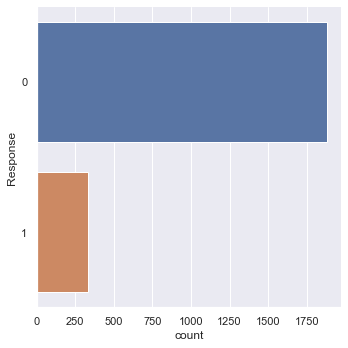

In [235]:
# Count Plot for Legendary Train
sb.catplot(y = "Response", data = Response, kind = "count")

### <font color = pink> Creating DataFrame of only numerical data
    Dropping variables that are categorical + those that we want to convert from numerical to categorical(Kidhome, Teenhome)

In [161]:
NumericalCustomerData = CustomerData.select_dtypes(include=['int64', 'float64'])
NumericalCustomerData = NumericalCustomerData.drop(['Z_CostContact', 'Z_Revenue', 'Complain', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'ID', 'Recency', 'Response'], axis=1)

In [162]:
NumericalCustomerData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Income               2216 non-null   float64
 2   Kidhome              2240 non-null   int64  
 3   Teenhome             2240 non-null   int64  
 4   DurationJoined       2240 non-null   int64  
 5   MntWines             2240 non-null   int64  
 6   MntFruits            2240 non-null   int64  
 7   MntMeatProducts      2240 non-null   int64  
 8   MntFishProducts      2240 non-null   int64  
 9   MntSweetProducts     2240 non-null   int64  
 10  MntGoldProds         2240 non-null   int64  
 11  NumDealsPurchases    2240 non-null   int64  
 12  NumWebPurchases      2240 non-null   int64  
 13  NumCatalogPurchases  2240 non-null   int64  
 14  NumStorePurchases    2240 non-null   int64  
 15  NumWebVisitsMonth    2240 non-null   i

### <font color = pink> Creating DataFrame for categorical data 

In [163]:
CategoricalCustomerData = pd.DataFrame(CustomerData[[ "Education", "Marital_Status", 'Complain', "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]])
CategoricalCustomerData.head()

,Education,Marital_Status,Complain,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
0,Graduation,Single,0,0,0,0,0,0
1,Graduation,Single,0,0,0,0,0,0
2,Graduation,Together,0,0,0,0,0,0
3,Graduation,Together,0,0,0,0,0,0
4,PhD,Married,0,0,0,0,0,0


In [164]:
CategoricalCustomerData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Education       2240 non-null   object
 1   Marital_Status  2240 non-null   object
 2   Complain        2240 non-null   int64 
 3   AcceptedCmp1    2240 non-null   int64 
 4   AcceptedCmp2    2240 non-null   int64 
 5   AcceptedCmp3    2240 non-null   int64 
 6   AcceptedCmp4    2240 non-null   int64 
 7   AcceptedCmp5    2240 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 157.5+ KB


In [165]:
#Checking the unique categories in each categorical variable that are not 0 and 1 
print("The different categories for Education are:", end=" ")
print(pd.unique(CustomerData["Education"]))
print(CustomerData['Education'].value_counts())
print("")
print("The different categories for Marital Status are:", end=" ")
print(pd.unique(CustomerData["Marital_Status"]))
print(CustomerData['Marital_Status'].value_counts())
print("")

The different categories for Education are: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

The different categories for Marital Status are: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64



In [166]:
#Dropping miscellaneous values for Marital_Status
CategoricalCustomerData = CategoricalCustomerData[CategoricalCustomerData['Marital_Status'] != 'YOLO']
CategoricalCustomerData = CategoricalCustomerData[CategoricalCustomerData['Marital_Status'] != 'Absurd']

In [167]:
#Combining the Alone and Single categories for Marital_Status since they have the same meaning 
CategoricalCustomerData['Marital_Status'] = CategoricalCustomerData['Marital_Status'].replace(['Single', 'Alone'], 'Single')

In [168]:
#Checking if combination is successful 
print("The different categories for Marital Status are:", end=" ")
print(pd.unique(CategoricalCustomerData["Marital_Status"]))
print(CategoricalCustomerData['Marital_Status'].value_counts())

The different categories for Marital Status are: ['Single' 'Together' 'Married' 'Divorced' 'Widow']
Married     864
Together    580
Single      483
Divorced    232
Widow        77
Name: Marital_Status, dtype: int64


In [169]:
#Checking final number of datapoints for categorical dataframe 
CategoricalCustomerData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Education       2236 non-null   object
 1   Marital_Status  2236 non-null   object
 2   Complain        2236 non-null   int64 
 3   AcceptedCmp1    2236 non-null   int64 
 4   AcceptedCmp2    2236 non-null   int64 
 5   AcceptedCmp3    2236 non-null   int64 
 6   AcceptedCmp4    2236 non-null   int64 
 7   AcceptedCmp5    2236 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 157.2+ KB


### <font color = pink> Editing CustomerData dataframe to drop miscellaneous values for marital status
    

In [170]:
CustomerData = CustomerData[CustomerData['Marital_Status'] != 'YOLO']
CustomerData = CustomerData[CustomerData['Marital_Status'] != 'Absurd']

In [171]:
CustomerData['Marital_Status'] = CustomerData['Marital_Status'].replace(['Single', 'Alone'], 'Single')

In [172]:
CustomerData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2236 non-null   int64  
 1   Year_Birth           2236 non-null   int64  
 2   Education            2236 non-null   object 
 3   Marital_Status       2236 non-null   object 
 4   Income               2212 non-null   float64
 5   Kidhome              2236 non-null   int64  
 6   Teenhome             2236 non-null   int64  
 7   DurationJoined       2236 non-null   int64  
 8   Recency              2236 non-null   int64  
 9   MntWines             2236 non-null   int64  
 10  MntFruits            2236 non-null   int64  
 11  MntMeatProducts      2236 non-null   int64  
 12  MntFishProducts      2236 non-null   int64  
 13  MntSweetProducts     2236 non-null   int64  
 14  MntGoldProds         2236 non-null   int64  
 15  NumDealsPurchases    2236 non-null   i

In [173]:
CustomerData=CustomerData.dropna()

In [174]:
CustomerData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2212 non-null   int64  
 1   Year_Birth           2212 non-null   int64  
 2   Education            2212 non-null   object 
 3   Marital_Status       2212 non-null   object 
 4   Income               2212 non-null   float64
 5   Kidhome              2212 non-null   int64  
 6   Teenhome             2212 non-null   int64  
 7   DurationJoined       2212 non-null   int64  
 8   Recency              2212 non-null   int64  
 9   MntWines             2212 non-null   int64  
 10  MntFruits            2212 non-null   int64  
 11  MntMeatProducts      2212 non-null   int64  
 12  MntFishProducts      2212 non-null   int64  
 13  MntSweetProducts     2212 non-null   int64  
 14  MntGoldProds         2212 non-null   int64  
 15  NumDealsPurchases    2212 non-null   i

# <font color=pink> Exploratory Data Analysis

### <font color = pink> Numerical type
    

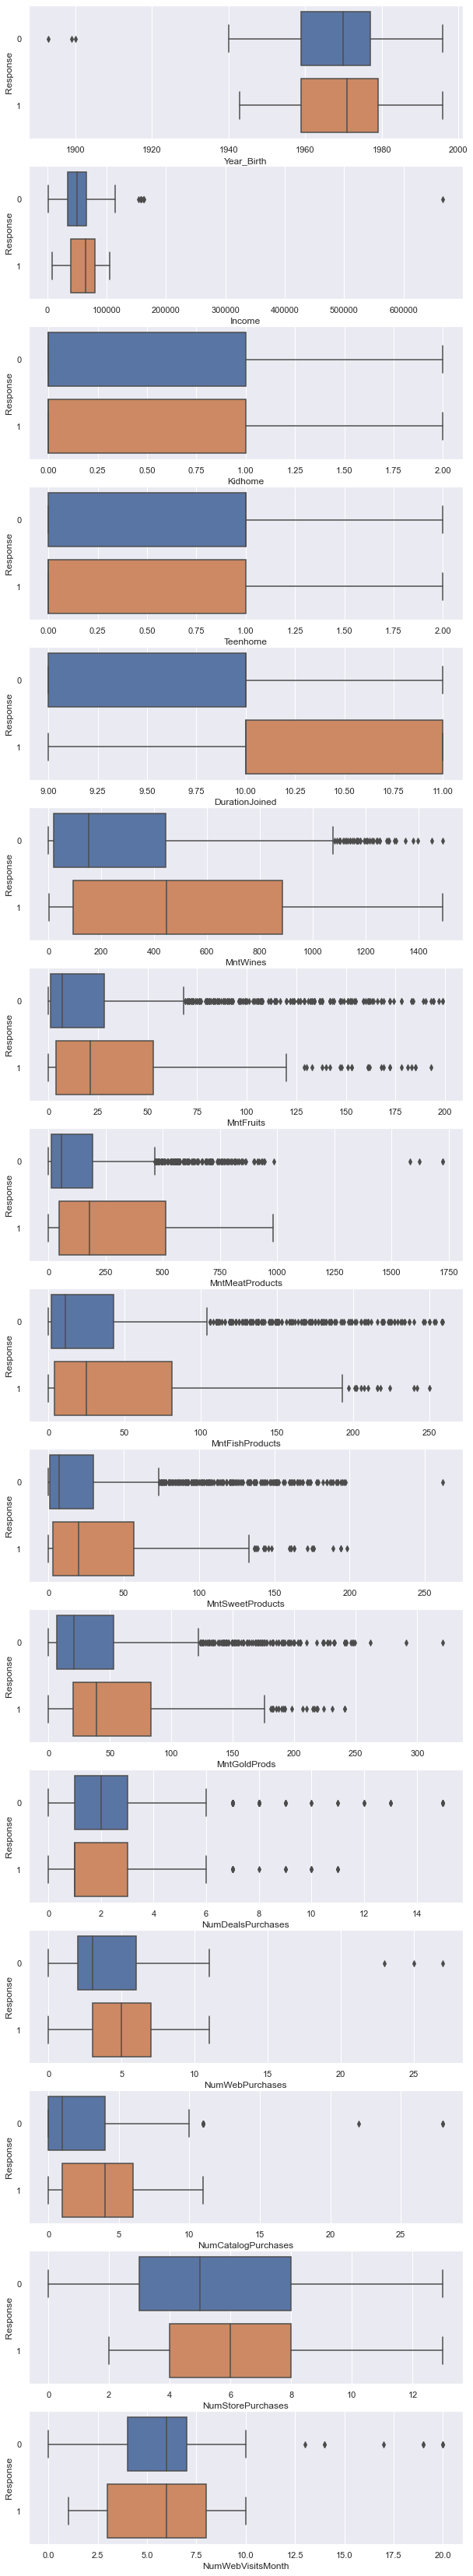

In [175]:
# Draw the distributions of all variables
f, axes = plt.subplots(16,1, figsize=(10, 60))
ConcatDF = pd.concat([NumericalCustomerData, Response], axis = 1).reindex(NumericalCustomerData.index)

count = 0
for var in NumericalCustomerData:
    sb.boxplot(x = ConcatDF[var], y = "Response", data = CustomerData, orient = "h",ax = axes[count])
    count += 1

Observations made:
1. Year_Birth has close to no relation with response as median is very similar 
2. Kidhome, Teenhome and DurationJoined have no distinct medians. Thus, upon doing further exploratory analysis, we found that these 3 variables take 3 discrete values as shown in the next block of code. 

In [176]:
print("The different categories for Kidhome are:", end=" ")
print(pd.unique(CustomerData["Kidhome"]))
print(CustomerData['Kidhome'].value_counts())
print("")
print("The different categories for Teenhome are:", end=" ")
print(pd.unique(CustomerData["Teenhome"]))
print(CustomerData['Teenhome'].value_counts())
print("")
print("The different categories for DurationJoined are:", end=" ")
print(pd.unique(CustomerData["DurationJoined"]))
print(CustomerData['DurationJoined'].value_counts())
print("")

The different categories for Kidhome are: [0 1 2]
0    1279
1     887
2      46
Name: Kidhome, dtype: int64

The different categories for Teenhome are: [0 1 2]
0    1145
1    1016
2      51
Name: Teenhome, dtype: int64

The different categories for DurationJoined are: [11  9 10]
10    1173
9      552
11     487
Name: DurationJoined, dtype: int64



Thus,  Kidhome, Teenhome and DurationJoined can be converted into categorical data as they only take 3 discrete values.

In [177]:
CategoricalCustomerData = pd.DataFrame(CustomerData[[ "Education", "Marital_Status", 'Complain', "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Kidhome", "Teenhome", "DurationJoined"]])
CategoricalCustomerData.head()

,Education,Marital_Status,Complain,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Kidhome,Teenhome,DurationJoined
0,Graduation,Single,0,0,0,0,0,0,0,0,11
1,Graduation,Single,0,0,0,0,0,0,1,1,9
2,Graduation,Together,0,0,0,0,0,0,0,0,10
3,Graduation,Together,0,0,0,0,0,0,1,0,9
4,PhD,Married,0,0,0,0,0,0,1,0,9


## <font color = pink> Categorical type
    Based on EDA of categorical data, whether or not a customer lodged a complained in the last 2 years does not have a large relation on whether they participated in the latest campaign. Therefore, we will drop the 'complain' variable and not use it for our machine learning models. 

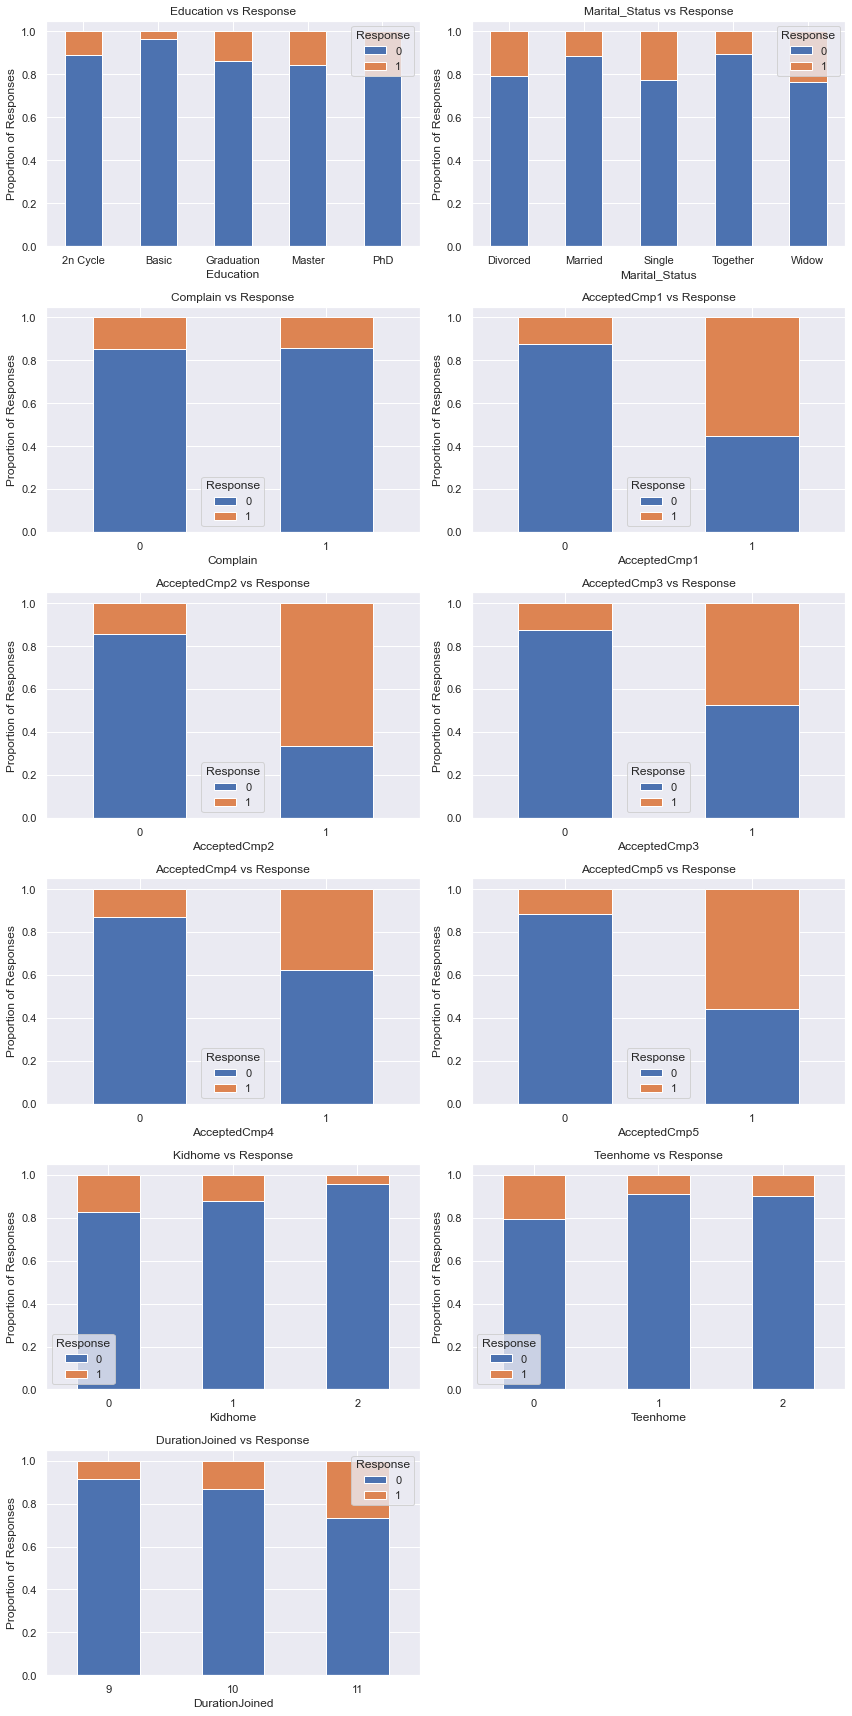

In [178]:
# Determine the number of rows and columns for the subplots
num_cols = 2
num_rows = len(CategoricalCustomerData.columns) // num_cols
if len(CategoricalCustomerData.columns) % num_cols != 0:
    num_rows += 1

# Create the subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 24))

# Flatten the axs array to make it easier to iterate over
axs = axs.flatten()

# Iterate over the categorical variables and plot each normalized contingency table on a separate subplot
for i, col in enumerate(CategoricalCustomerData.columns):
    
    # Create a normalized contingency table of the column and the "Response" variable
    contingency_table = pd.crosstab(CategoricalCustomerData[col], Response["Response"], normalize='index')
    
    # Plot the bar graph on the appropriate subplot, using red and green for "No" and "Yes" responses
    contingency_table.plot(kind='bar', ax=axs[i],stacked=True)
    
    # Set the title and labels for the subplot
    axs[i].set_title(f"{col} vs Response")
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Proportion of Responses")
    
    # Rotate the x-axis labels if necessary
    axs[i].tick_params(axis='x', rotation=0)
    

# If the number of columns is odd, hide the last subplot
if len(CategoricalCustomerData.columns) % num_cols != 0:
    axs[-1].axis('off')

# Display the subplots
plt.tight_layout()
plt.show()



### <font color = pink> Splitting DataSet into People(6), Products(6), Promotion(6), Places(3)
    For People DF: Dropped Year_Birth because from the EDA(plotting boxplots of var against response), there was no obvious/significant correlation between Year birth and response. There is only a very slight difference in the median pf year_birth for response = 0 and response = 1.
    
    For Place DF: Dropped NumWebVisitsMonth as there is no obvious correlation. The median for the variable for response =0 and response = 1 seems to be the same. 

In [179]:
People = pd.DataFrame(CustomerData[["Education", "Marital_Status", "Income", "Kidhome", "Teenhome", "DurationJoined", "Response"]])
People.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,DurationJoined,Response
0,Graduation,Single,58138.0,0,0,11,1
1,Graduation,Single,46344.0,1,1,9,0
2,Graduation,Together,71613.0,0,0,10,0
3,Graduation,Together,26646.0,1,0,9,0
4,PhD,Married,58293.0,1,0,9,0


In [180]:
People.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Education       2212 non-null   object 
 1   Marital_Status  2212 non-null   object 
 2   Income          2212 non-null   float64
 3   Kidhome         2212 non-null   int64  
 4   Teenhome        2212 non-null   int64  
 5   DurationJoined  2212 non-null   int64  
 6   Response        2212 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 202.8+ KB


In [181]:
Products = pd.DataFrame(CustomerData[["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts","MntSweetProducts","MntGoldProds", "Response"]])
Products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   MntWines          2212 non-null   int64
 1   MntFruits         2212 non-null   int64
 2   MntMeatProducts   2212 non-null   int64
 3   MntFishProducts   2212 non-null   int64
 4   MntSweetProducts  2212 non-null   int64
 5   MntGoldProds      2212 non-null   int64
 6   Response          2212 non-null   int64
dtypes: int64(7)
memory usage: 202.8 KB


In [182]:
Promotion = pd.DataFrame(CustomerData[["NumDealsPurchases", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"]])
Promotion.head()
People.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Education       2212 non-null   object 
 1   Marital_Status  2212 non-null   object 
 2   Income          2212 non-null   float64
 3   Kidhome         2212 non-null   int64  
 4   Teenhome        2212 non-null   int64  
 5   DurationJoined  2212 non-null   int64  
 6   Response        2212 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 202.8+ KB


In [183]:
Place = pd.DataFrame(CustomerData[["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "Response"]])
Place.head()
Place.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   NumWebPurchases      2212 non-null   int64
 1   NumCatalogPurchases  2212 non-null   int64
 2   NumStorePurchases    2212 non-null   int64
 3   Response             2212 non-null   int64
dtypes: int64(4)
memory usage: 150.9 KB


# <font color=pink> Applying Support Vector Machines on first dataframe: People

In [184]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [185]:
#converting Education and Marital Status into numeric 
People['Education'] = People['Education'].replace(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], [2,4,3,0,1])
People['Marital_Status'] = People['Marital_Status'].replace(['Single', 'Together', 'Married', 'Divorced', 'Widow'], [0,1,2,3,4])
People.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,DurationJoined,Response
0,2,0,58138.0,0,0,11,1
1,2,0,46344.0,1,1,9,0
2,2,1,71613.0,0,0,10,0
3,2,1,26646.0,1,0,9,0
4,4,2,58293.0,1,0,9,0


In [186]:
PeopleMulti = pd.DataFrame(People[["Education", "Marital_Status", "Income", "DurationJoined", "Kidhome", "Teenhome"]])
PeopleMulti.head()

,Education,Marital_Status,Income,DurationJoined,Kidhome,Teenhome
0,2,0,58138.0,11,0,0
1,2,0,46344.0,9,1,1
2,2,1,71613.0,10,0,0
3,2,1,26646.0,9,1,0
4,4,2,58293.0,9,1,0


In [187]:
Response = pd.DataFrame(CustomerData['Response'])

In [188]:
#Peforming random splitting on the dataset 
#Random split into train and test set
People_train, People_test, Response_train, Response_test = train_test_split(PeopleMulti, Response, test_size = 0.2)

# Check the sample sizes
print("Train Set :", Response_train.shape, People_train.shape)
print("Test Set  :", Response_test.shape, People_test.shape)

Train Set : (1769, 1) (1769, 6)
Test Set  : (443, 1) (443, 6)


In [189]:
#scaling the data so that svm works better
scaler = StandardScaler()
People_train_scaled = scaler.fit_transform(People_train)
People_test_scaled = scaler.transform(People_test)

In [190]:
#instantiate SVM model
clf = SVC(kernel='linear')

In [191]:
#Train the SVM Model with the train set
clf.fit(People_train_scaled, Response_train.values.ravel())

SVC(kernel='linear')

In [192]:
# Predict the Repsonse values from Predictors
Response_test_pred = clf.predict(People_test_scaled)

In [193]:
Response_train_pred = clf.predict(People_train_scaled)

In [194]:
#Checking the accuracy of the model
accuracy_score(Response_test, Response_test_pred)

0.8668171557562077

In [195]:
accuracy_score(Response_train, Response_train_pred)

0.8462408140192199

<AxesSubplot:>

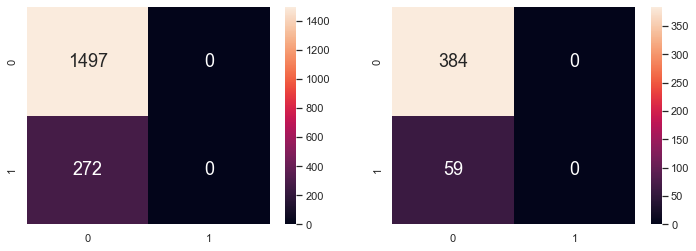

In [196]:
from sklearn.metrics import confusion_matrix
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(Response_train, Response_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(Response_test, Response_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# <font color=pink> Applying Support Vector Machines on first dataframe: Products

In [197]:
Products = Products.drop('Response', axis = 1)

In [198]:
Products.head()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15


In [199]:
Response = pd.DataFrame(CustomerData['Response'])

In [200]:
#Peforming random splitting on the dataset 
#Random split into train and test set
Products_train, Products_test, ResponseProducts_train, ResponseProducts_test = train_test_split(Products, Response, test_size = 0.2)

# Check the sample sizes
print("Train Set :", ResponseProducts_train.shape, Products_train.shape)
print("Test Set  :", ResponseProducts_test.shape, Products_test.shape)

Train Set : (1769, 1) (1769, 6)
Test Set  : (443, 1) (443, 6)


In [201]:
#scaling the data so that svm works better
scaler = StandardScaler()
Products_train_scaled = scaler.fit_transform(Products_train)
Products_test_scaled = scaler.transform(Products_test)

In [202]:
#instantiate SVM model
clfProducts = SVC(kernel='linear')

In [203]:
#Train the SVM Model with the train set
clfProducts.fit(Products_train_scaled, ResponseProducts_train.values.ravel())

SVC(kernel='linear')

In [204]:
# Predict the Repsonse values from Predictors
ResponseProducts_test_pred = clfProducts.predict(Products_test_scaled)

In [205]:
ResponseProducts_train_pred = clfProducts.predict(Products_train_scaled)

In [206]:
#Checking the accuracy of the model
accuracy_score(ResponseProducts_test, ResponseProducts_test_pred)

0.8329571106094809

In [207]:
accuracy_score(ResponseProducts_train, ResponseProducts_train_pred)

0.8547201808931599

<AxesSubplot:>

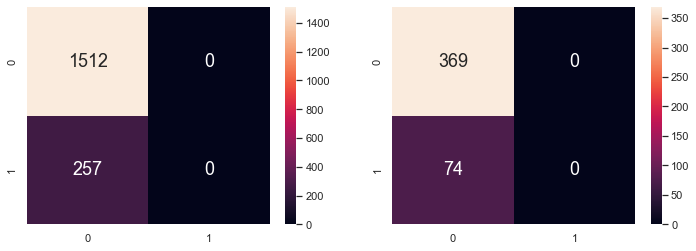

In [208]:
from sklearn.metrics import confusion_matrix
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(ResponseProducts_train, ResponseProducts_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(ResponseProducts_test, ResponseProducts_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# <font color = pink> Applying Support Vector Machines on first dataframe: Promotion

In [209]:
Promotion=Promotion.drop('Response', axis=1)

In [210]:
Promotion.head()

,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
0,3,0,0,0,0,0
1,2,0,0,0,0,0
2,1,0,0,0,0,0
3,2,0,0,0,0,0
4,5,0,0,0,0,0


In [211]:
Response = pd.DataFrame(CustomerData['Response'])

In [212]:
#Peforming random splitting on the dataset 
#Random split into train and test set
Promotion_train, Promotion_test, ResponsePromo_train, ResponsePromo_test = train_test_split(Promotion, Response, test_size = 0.2)

# Check the sample sizes
print("Train Set :", ResponsePromo_train.shape, Promotion_train.shape)
print("Test Set  :",ResponsePromo_test.shape, Promotion_test.shape)

Train Set : (1769, 1) (1769, 6)
Test Set  : (443, 1) (443, 6)


In [213]:
#scaling the data so that svm works better
scaler = StandardScaler()
Promotion_train_scaled = scaler.fit_transform(Promotion_train)
Promotion_test_scaled = scaler.transform(Promotion_test)

In [214]:
#instantiate SVM model
clfPromotion = SVC(kernel='linear')

In [215]:
#Train the SVM Model with the train set
clfPromotion.fit(Promotion_train_scaled, ResponsePromo_train.values.ravel())

SVC(kernel='linear')

In [216]:
# Predict the Repsonse values from Predictors
ResponsePromo_test_pred = clf.predict(Promotion_test_scaled)
ResponsePromo_train_pred = clf.predict(Promotion_train_scaled)

In [217]:
#Checking the accuracy of the model
accuracy_score(ResponsePromo_test, ResponsePromo_test_pred)

0.835214446952596

In [218]:
accuracy_score(ResponsePromo_train, ResponsePromo_train_pred)

0.8541548897682306

<AxesSubplot:>

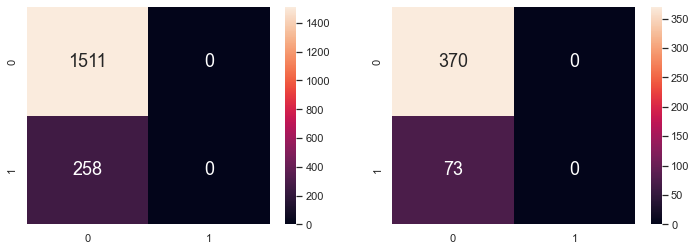

In [219]:
from sklearn.metrics import confusion_matrix
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(ResponsePromo_train, ResponsePromo_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(ResponsePromo_test, ResponsePromo_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# <font color = pink> Applying Support Vector Machines on first dataframe: Places

In [220]:
Place = Place.drop('Response', axis = 1)

In [221]:
Place.head()

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,8,10,4
1,1,1,2
2,8,2,10
3,2,0,4
4,5,3,6


In [222]:
#Peforming random splitting on the dataset 
#Random split into train and test set
Place_train, Place_test, ResponsePlace_train, ResponsePlace_test = train_test_split(Promotion, Response, test_size = 0.2)

# Check the sample sizes
print("Train Set :", ResponsePlace_train.shape, Place_train.shape)
print("Test Set  :",ResponsePlace_test.shape, Place_test.shape)

Train Set : (1769, 1) (1769, 6)
Test Set  : (443, 1) (443, 6)


In [223]:
#scaling the data so that svm works better
scaler = StandardScaler()
Place_train_scaled = scaler.fit_transform(Place_train)
Place_test_scaled = scaler.transform(Place_test)

In [224]:
#instantiate SVM model
clfPlace = SVC(kernel='rbf', C=10, gamma=0.1 )

In [225]:
#Train the SVM Model with the train set
clfPlace.fit(Place_train_scaled, ResponsePlace_train.values.ravel())

SVC(C=10, gamma=0.1)

In [226]:
# Predict the Repsonse values from Predictors
ResponsePlace_test_pred = clf.predict(Place_test_scaled)
ResponsePlace_train_pred = clf.predict(Place_train_scaled)

In [227]:
#Checking the accuracy of the model
accuracy_score(ResponsePlace_test, ResponsePlace_test_pred)

0.8510158013544018

In [228]:
accuracy_score(ResponsePlace_train, ResponsePlace_train_pred)

0.8501978518937253

<AxesSubplot:>

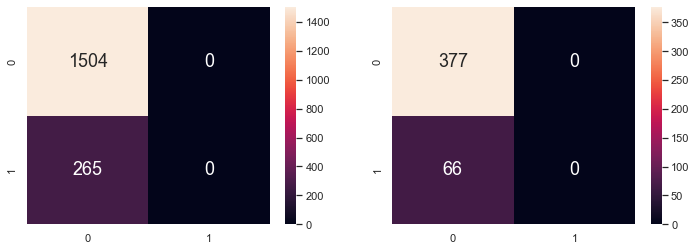

In [229]:
from sklearn.metrics import confusion_matrix
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(ResponsePlace_train, ResponsePlace_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(ResponsePlace_test, ResponsePlace_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# <font color = pink> Final conclusion for Support Vector Machine Model
    
    Good at predicting true negatives but very poor at predicted true positives. However, overall classification accuracy is generally high, usually taking a value of roughly 0.85. Classification accuracy is the highest for Place dataframe. Using the SVM Model on the test set for Place dataframe gives a classification accuracy of 0.871. 